# Single earthquake example (for multiple receiver observations)

Example of shear-wave splitting applied to an icequake from Rutford Ice Stream, Antarctica. 

The event is an icequake from Hudson et al. (2020).

Hudson, T.S., Brisbourne, A.M., Walter, F., Graff, D., & White, R. S. (2020). Icequake source mechanisms for studying glacial sliding. Journal of Geophysical Research: Earth Surface. https://doi.org/10.1029/2020JF005627



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib notebook

## 1. Load data for event:

Data can be from an archive of continuous seismic data, or from a mseed file containing only data for the event.

In [8]:
# Load data:
archive_vs_file = "file" 
mseed_file_path = "data/20090121042009180_ice_flow_dir_corrected.m"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"
starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(mseed_file_path, starttime=starttime, endtime=endtime, archive_vs_file=archive_vs_file)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 80.0]
st = load_wfs_obj.read_waveform_data()


## 2. Calculate splitting:

Note: Here, event information such as S arrival time, ray back-azimuth and ray inclination are taken automatically from a nonlinloc event file (see other examples for manual passing of these parameters).

In [9]:
# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st, nonlinloc_event_path=nonlinloc_event_path) #(st, nonlinloc_event_path) #(st.select(station="ST01"), nonlinloc_event_path)
splitting_event.overall_win_start_pre_fast_S_pick = 0.3
splitting_event.win_S_pick_tolerance = 0.1
splitting_event.overall_win_start_post_fast_S_pick = 0.2
splitting_event.rotate_step_deg = 2.0
splitting_event.max_t_shift_s = 0.1
splitting_event.n_win = 10
splitting_event.perform_sws_analysis(coord_system="ZNE", sws_method="EV")


No S phase pick for station: ST08 therefore skipping this station.
No S phase pick for station: ST06 therefore skipping this station.
No S phase pick for station: ST10 therefore skipping this station.
No S phase pick for station: ST09 therefore skipping this station.
No S phase pick for station: ST07 therefore skipping this station.


station  phi_from_Q  phi_from_N  phi_from_U  phi_err     dt  dt_err  \
0    ST05        26.0       74.57        90.0     11.0  0.004   0.003   
0    ST04       -48.0       54.07        90.0      3.0  0.044   0.001   
0    ST02        38.0       67.53        90.0      3.0  0.042   0.018   
0    ST03       -82.0      -87.53        90.0      6.0  0.020   0.001   
0    ST01       -60.0       48.74        90.0      5.0  0.048   0.002   

   src_pol_from_N  src_pol_from_U  src_pol_from_N_err  src_pol_from_U_err  \
0      154.197600       89.946359           17.214782           10.537896   
0      165.368197       90.444536            6.430684            3.923207   
0      163.575889       90.504097            6.436617            2.740569   
0       26.199288       95.881281           12.880766           23.807806   
0      168.369942       88.213619            9.483751            6.103969   

   Q_w  lambda2/lambda1 ratio  ray_back_azi  ray_inc  
0  NaN               0.055499         48.57    141.8  
0  NaN               0.033150        282.07    163.9  
0  NaN               0.034949         29.53    160.6  
0  NaN               0.068566        354.47    144.4  
0  NaN               0.052323        108.74    156.5

## 3. Plot result:

<IPython.core.display.Javascript object>


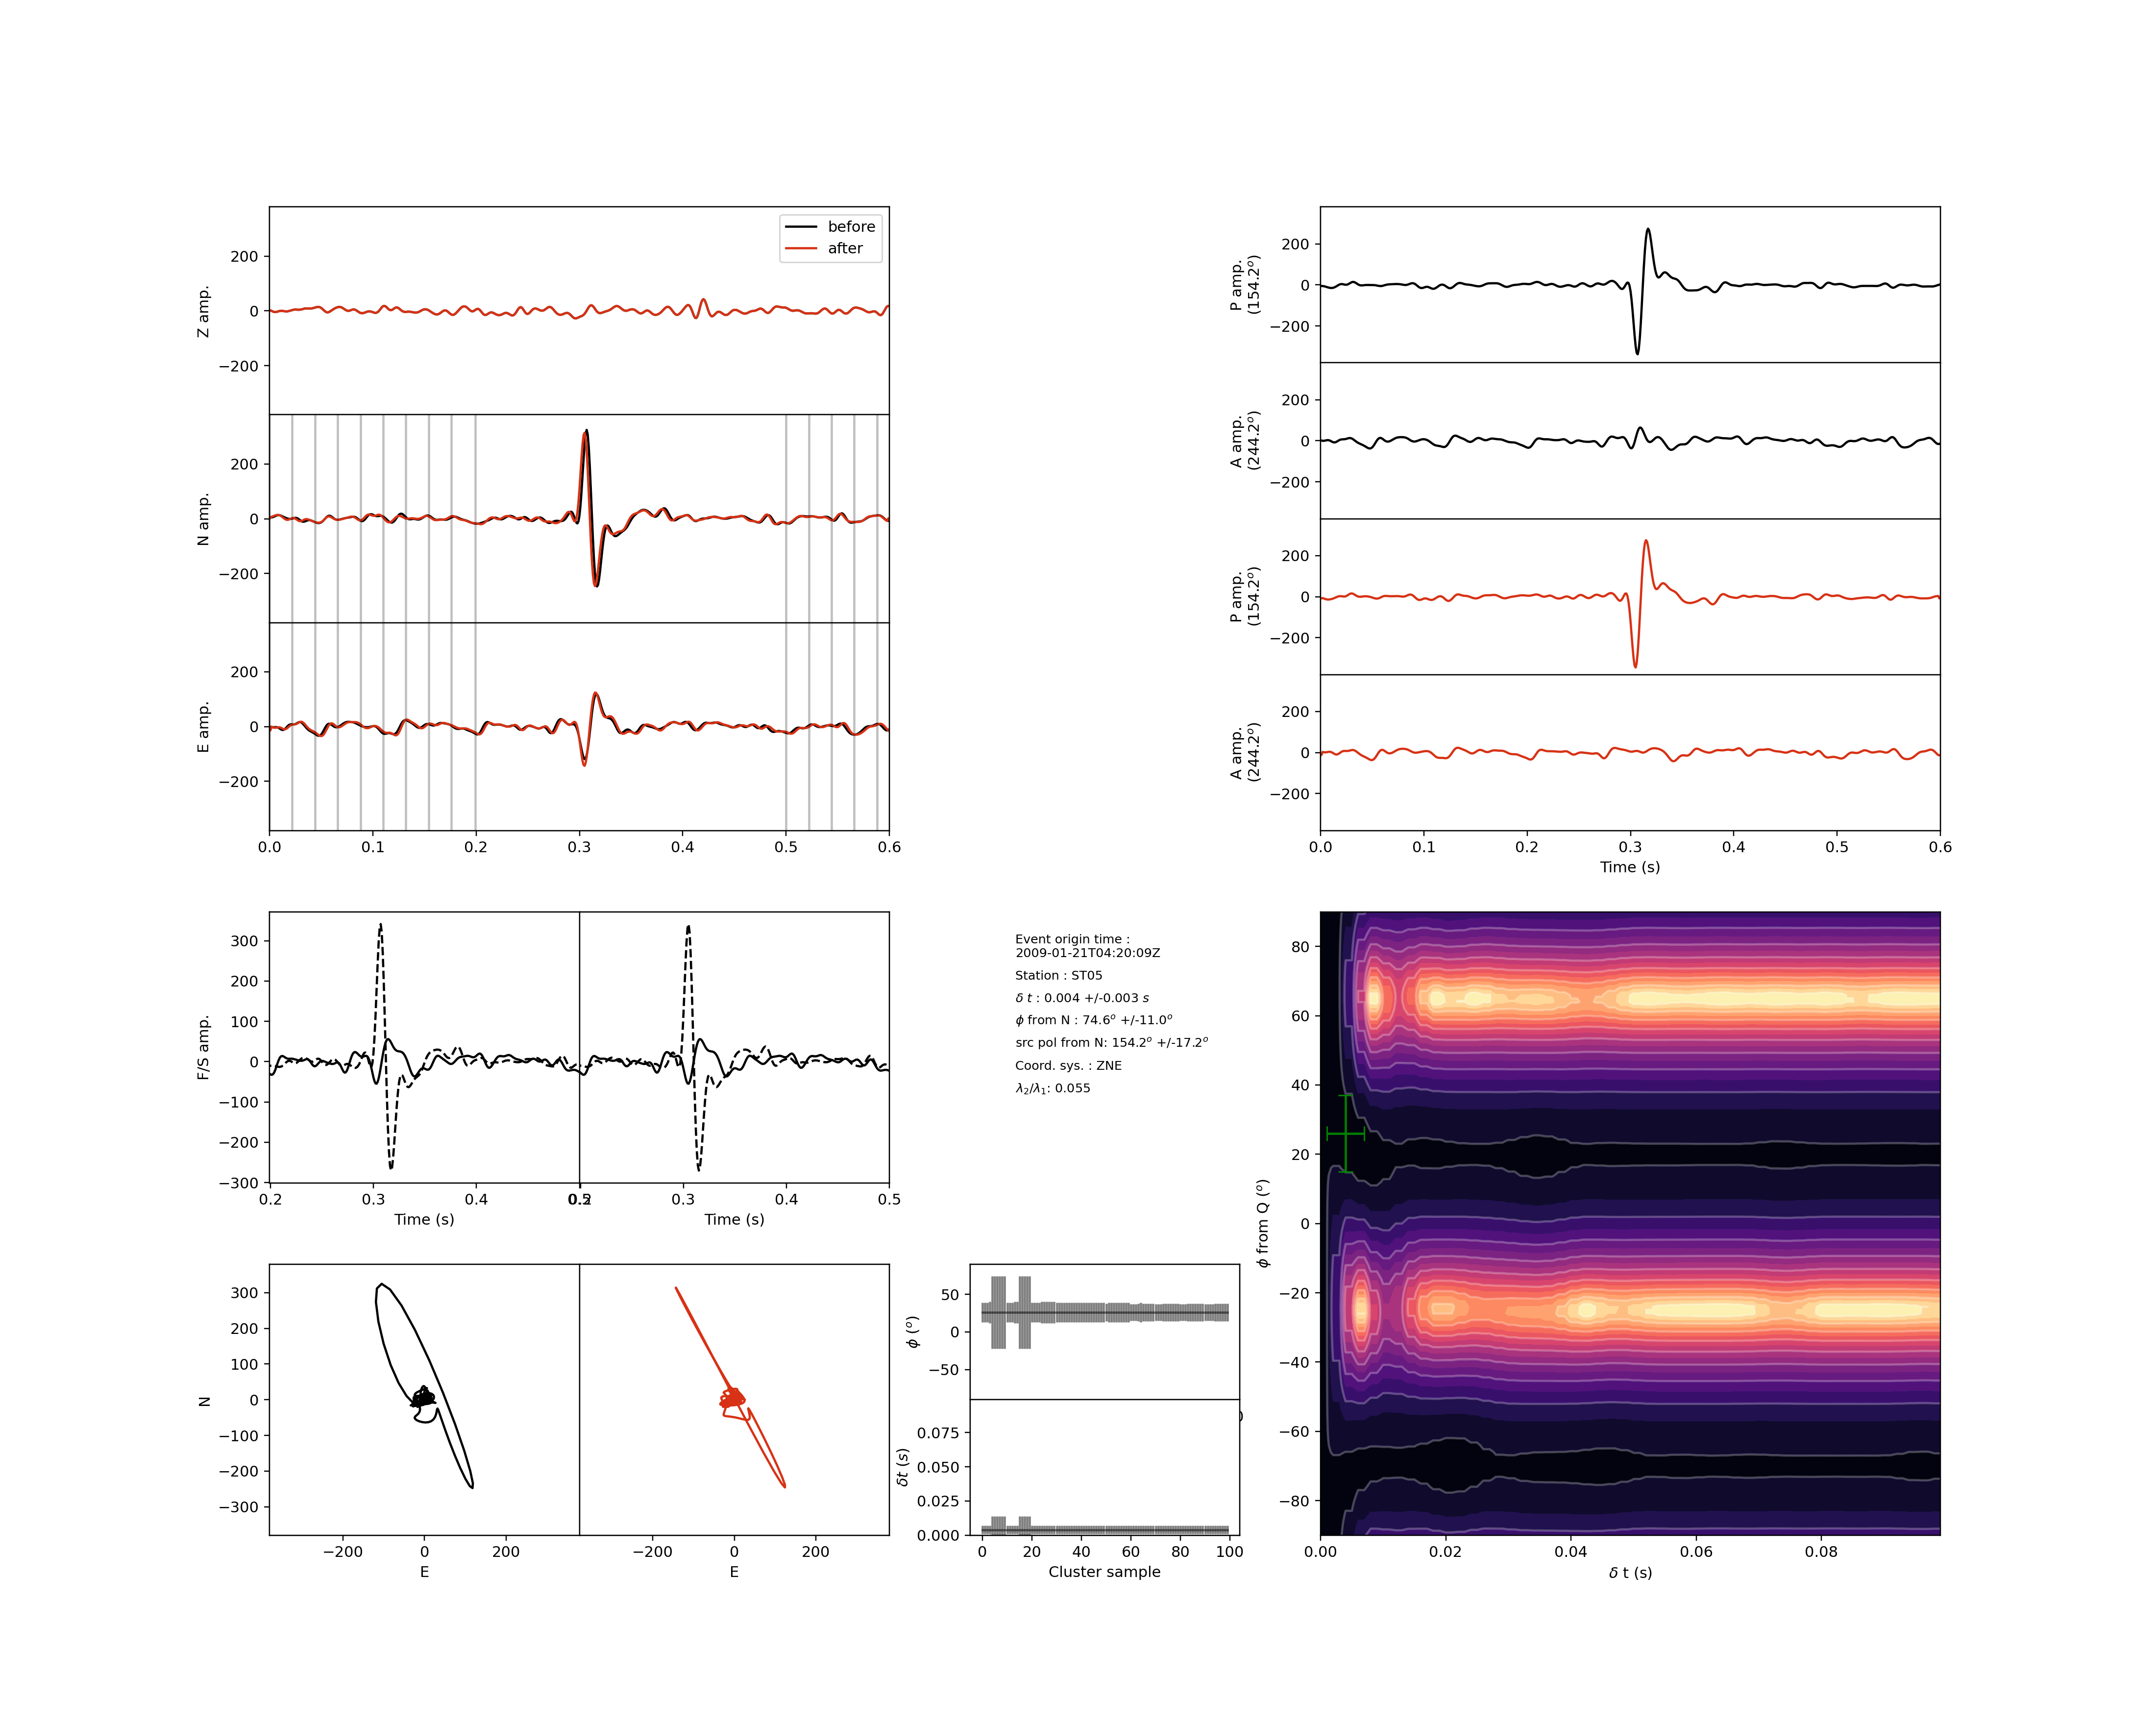

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1907: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


<IPython.core.display.Javascript object>


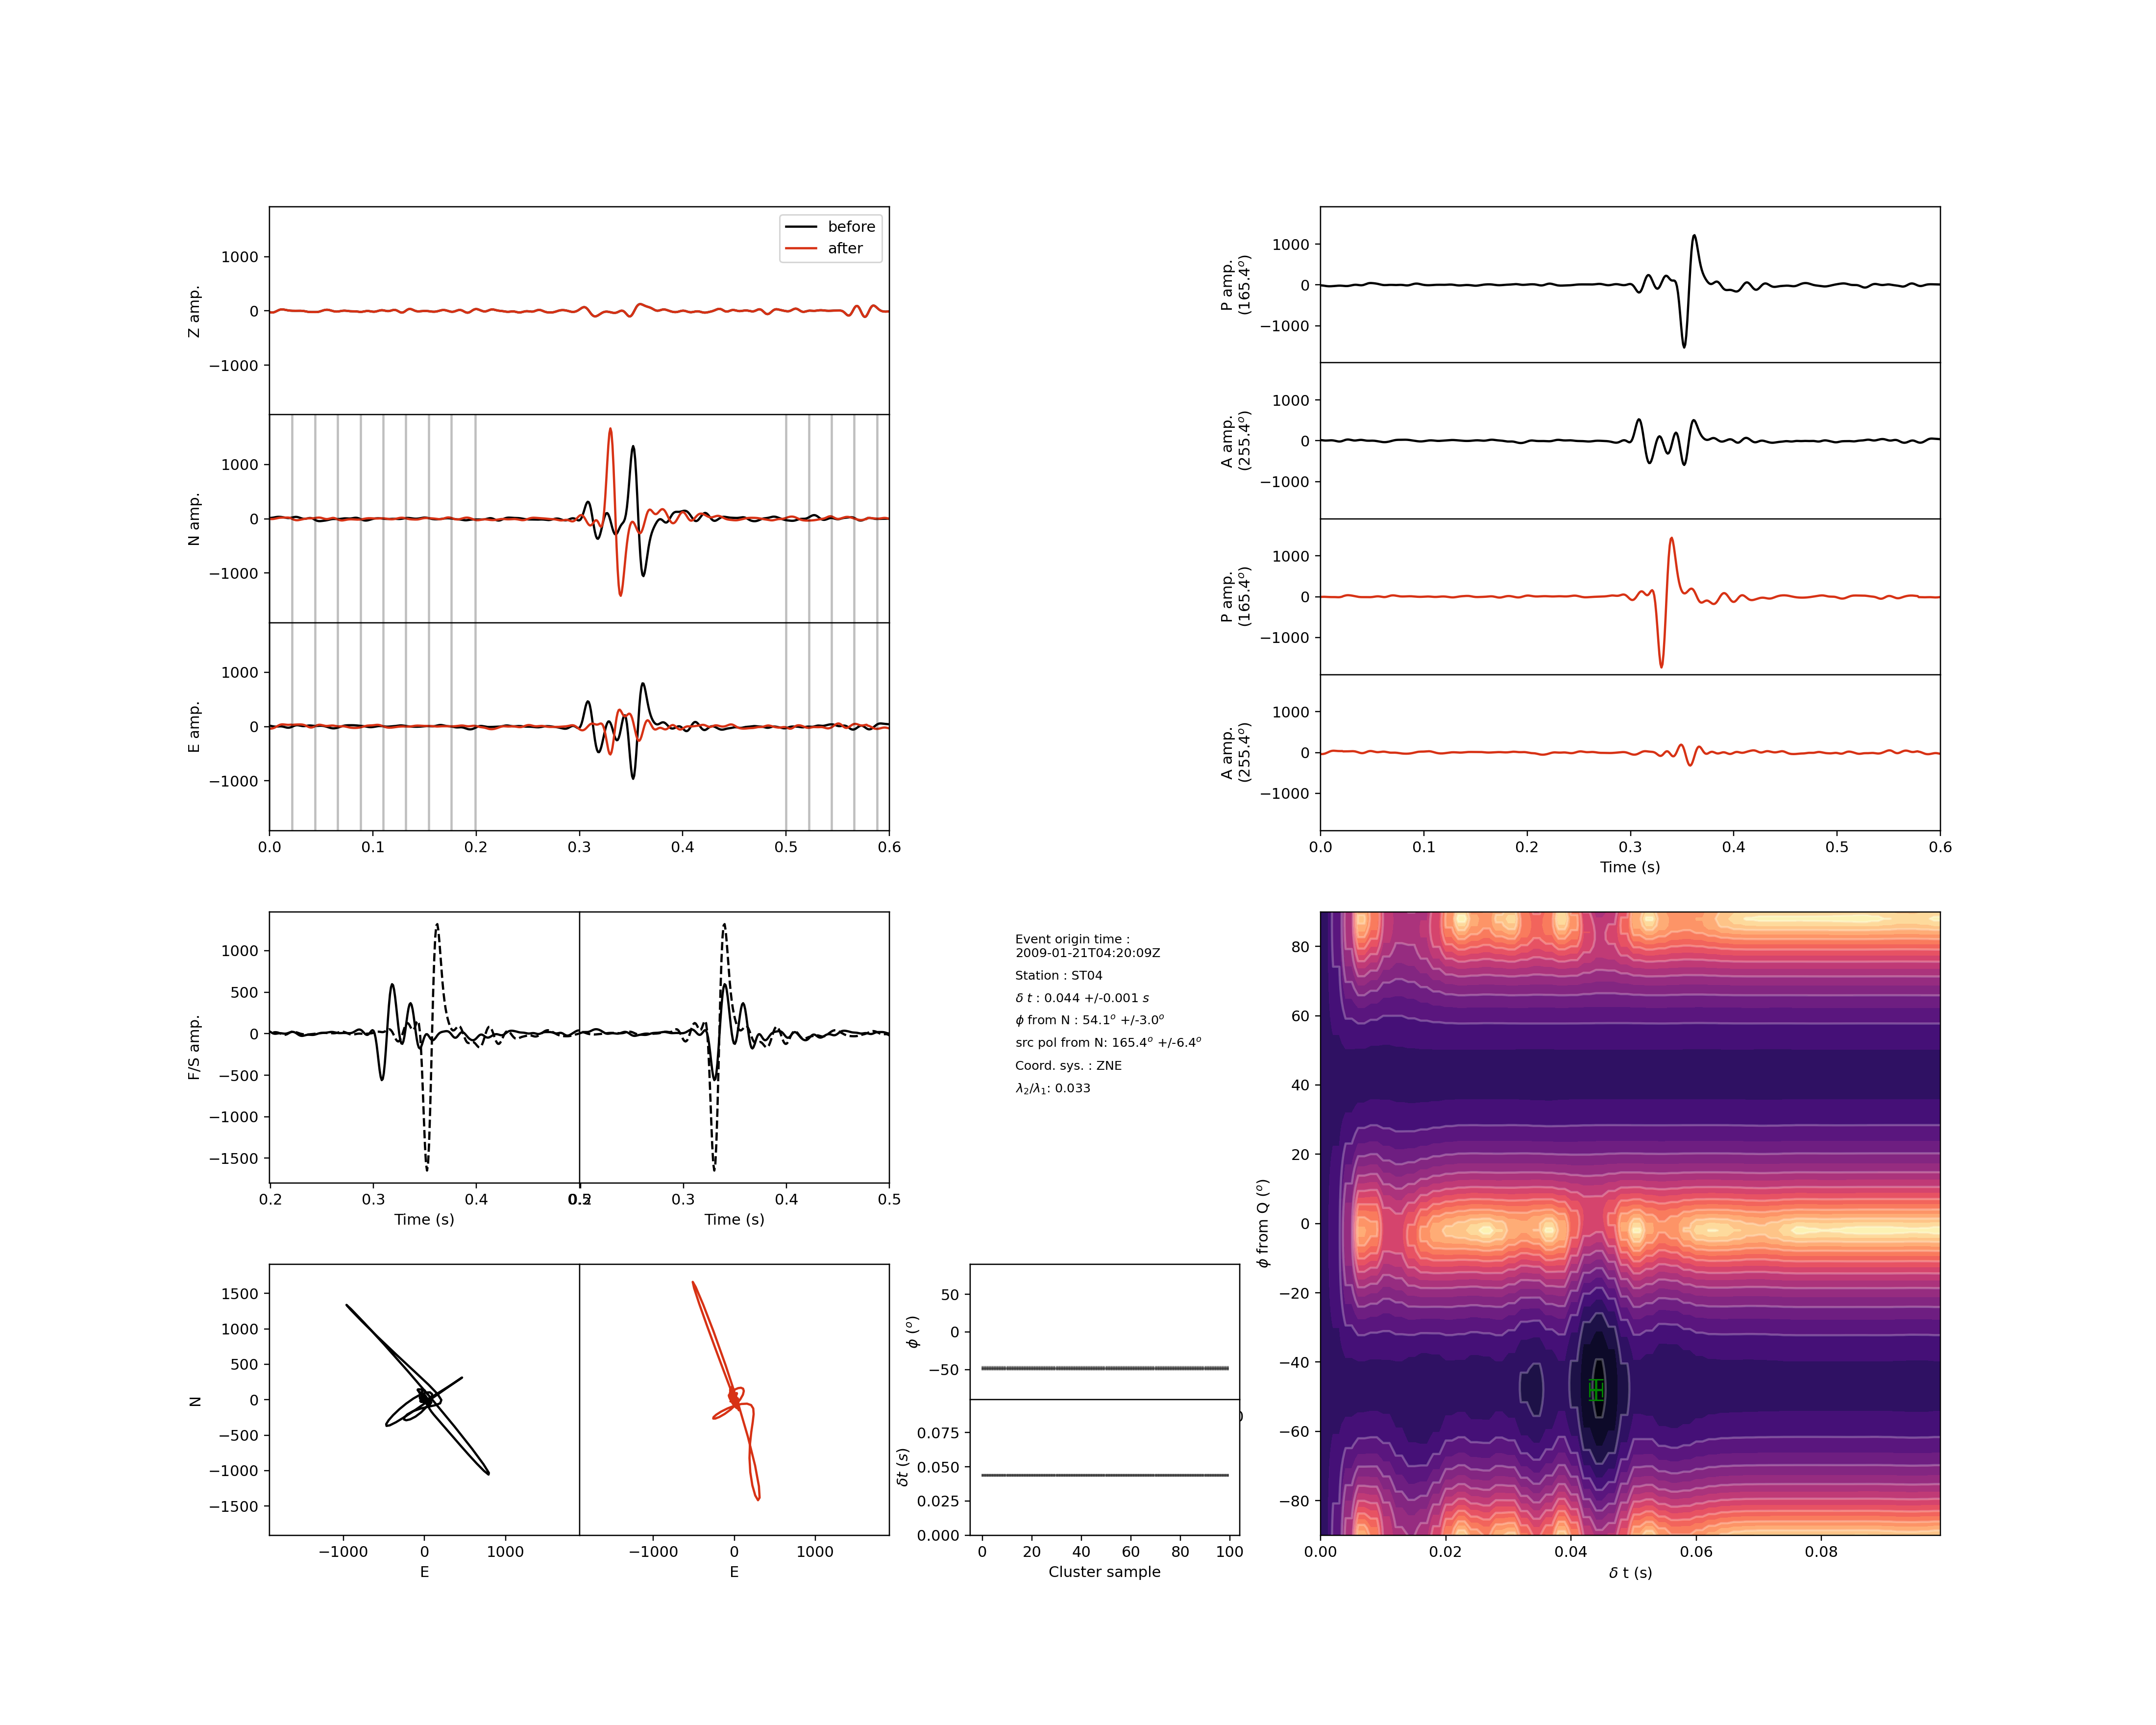

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1907: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


No S phase pick for station: ST08 therefore skipping this station.
Skipping waveform correction for station: ST08
No S phase pick for station: ST06 therefore skipping this station.
Skipping waveform correction for station: ST06
No S phase pick for station: ST10 therefore skipping this station.
Skipping waveform correction for station: ST10


<IPython.core.display.Javascript object>


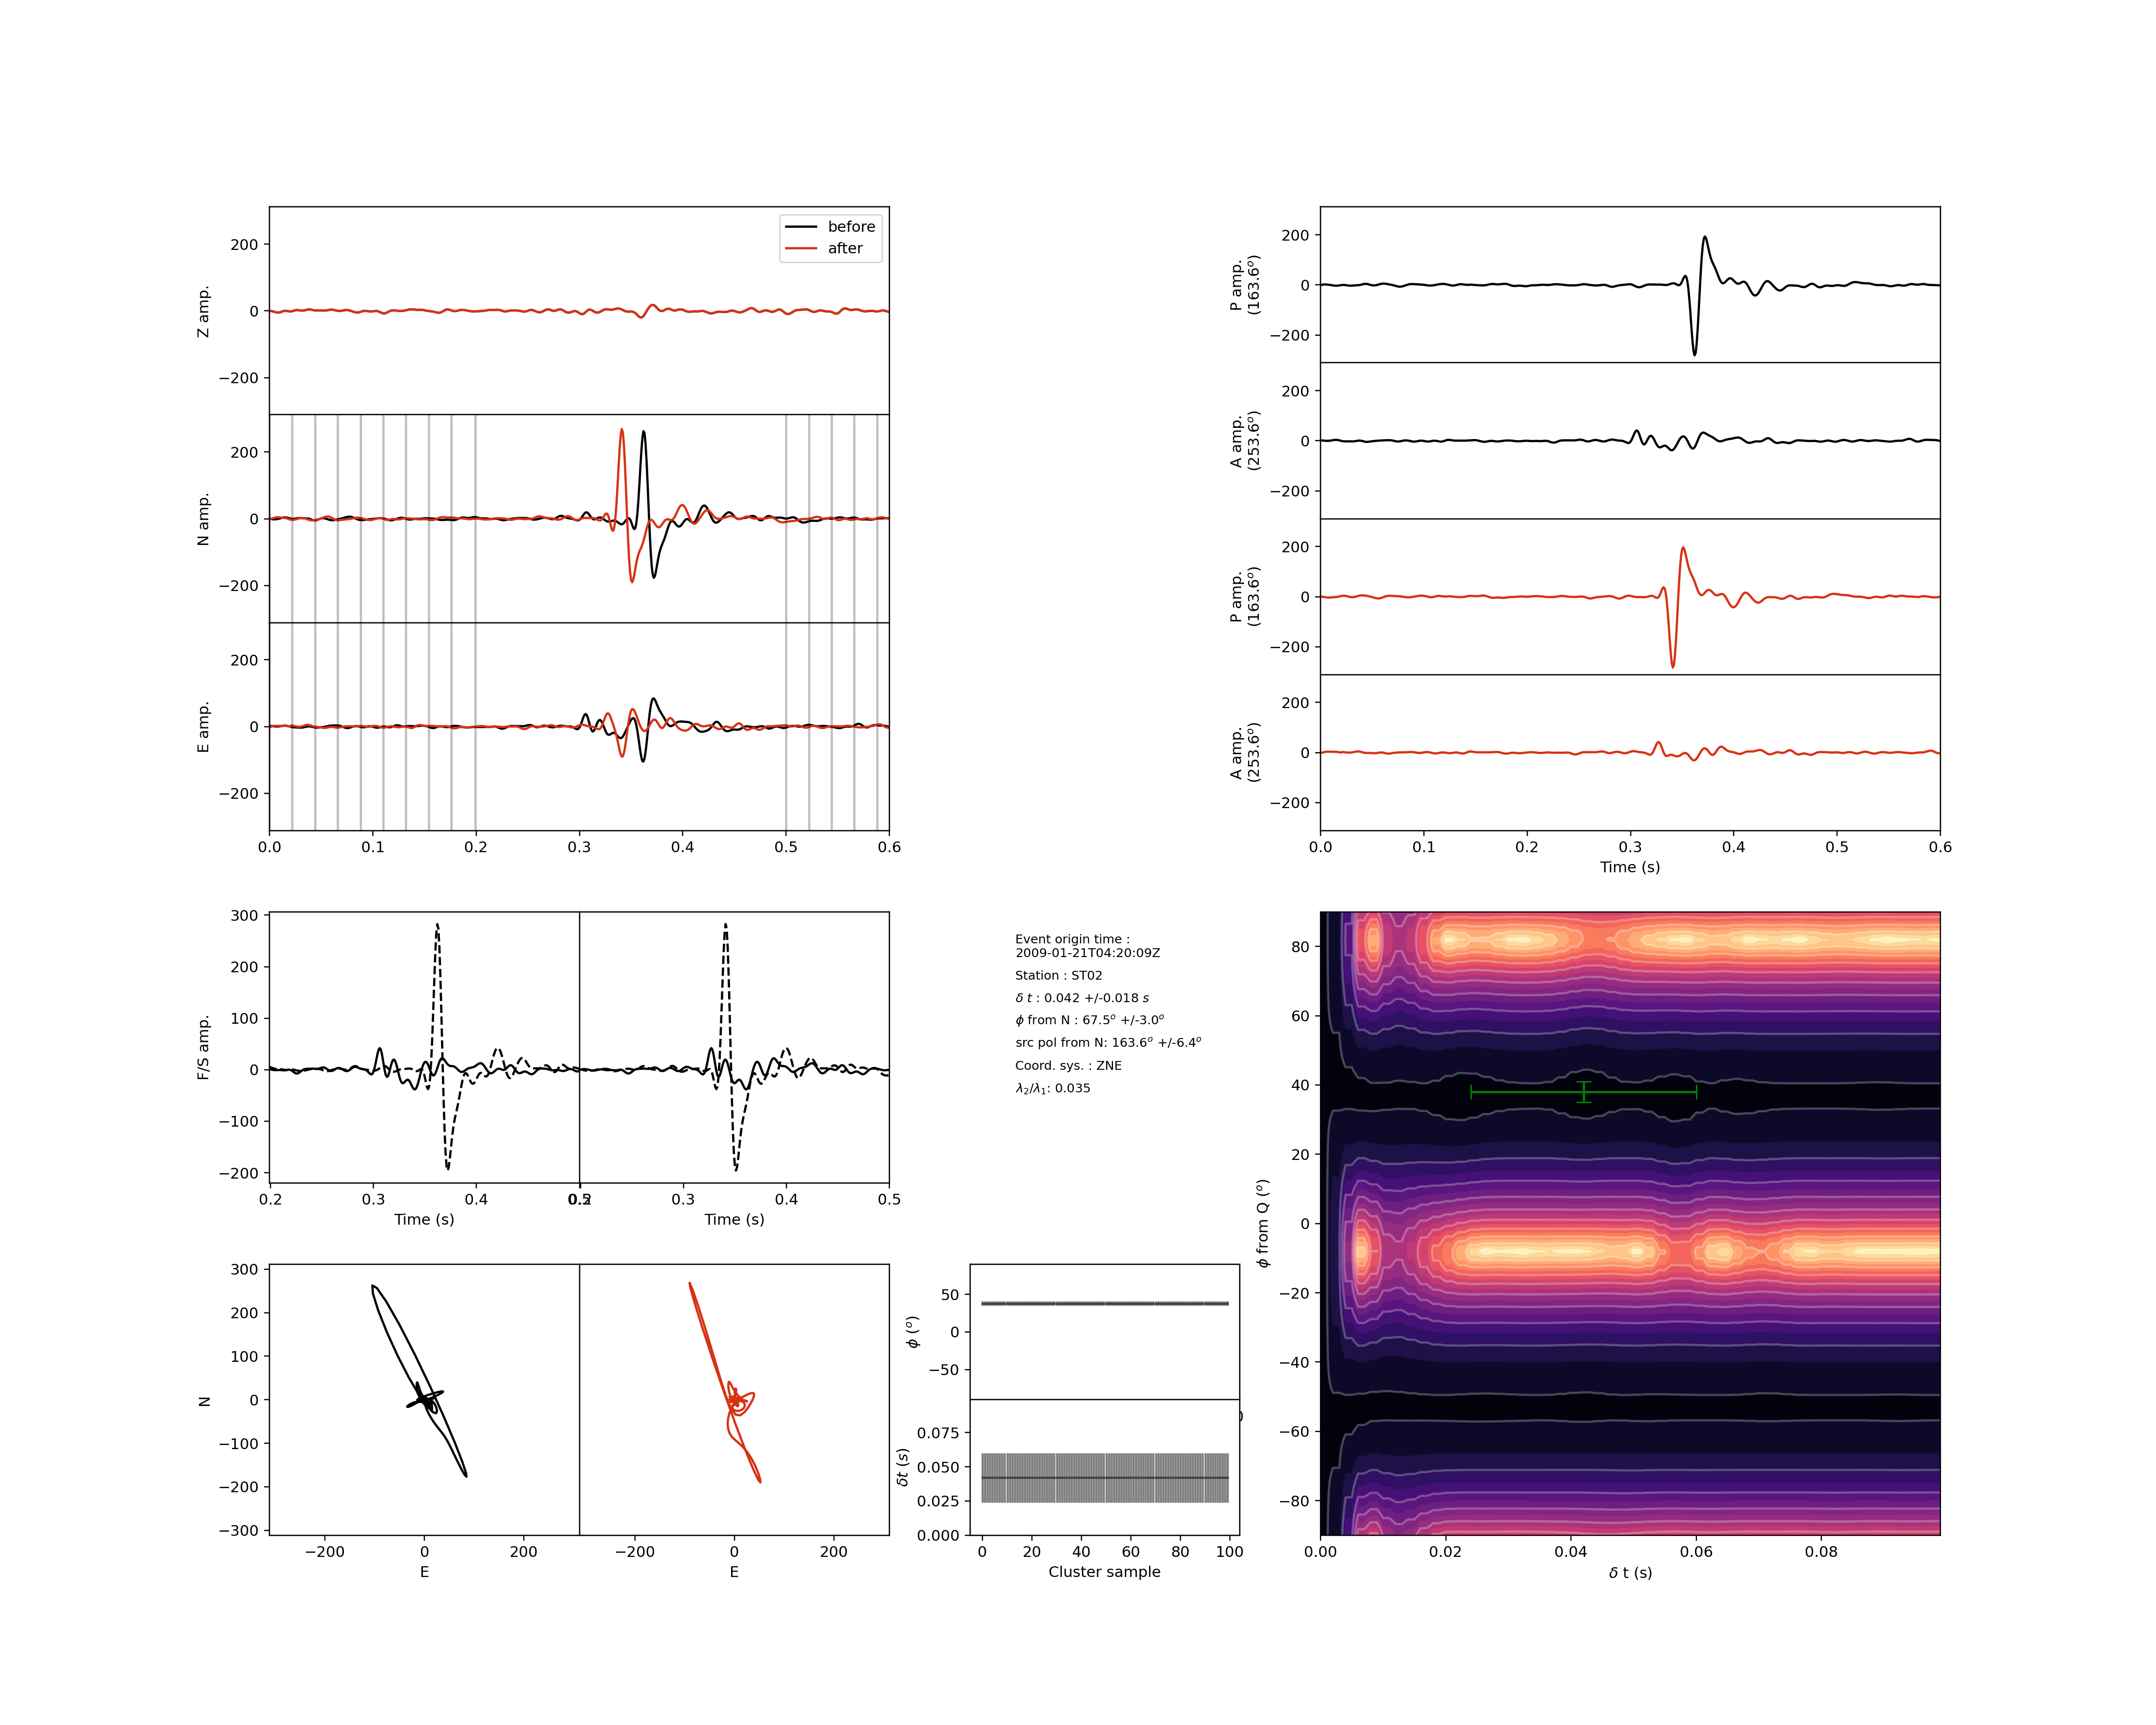

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1907: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


<IPython.core.display.Javascript object>


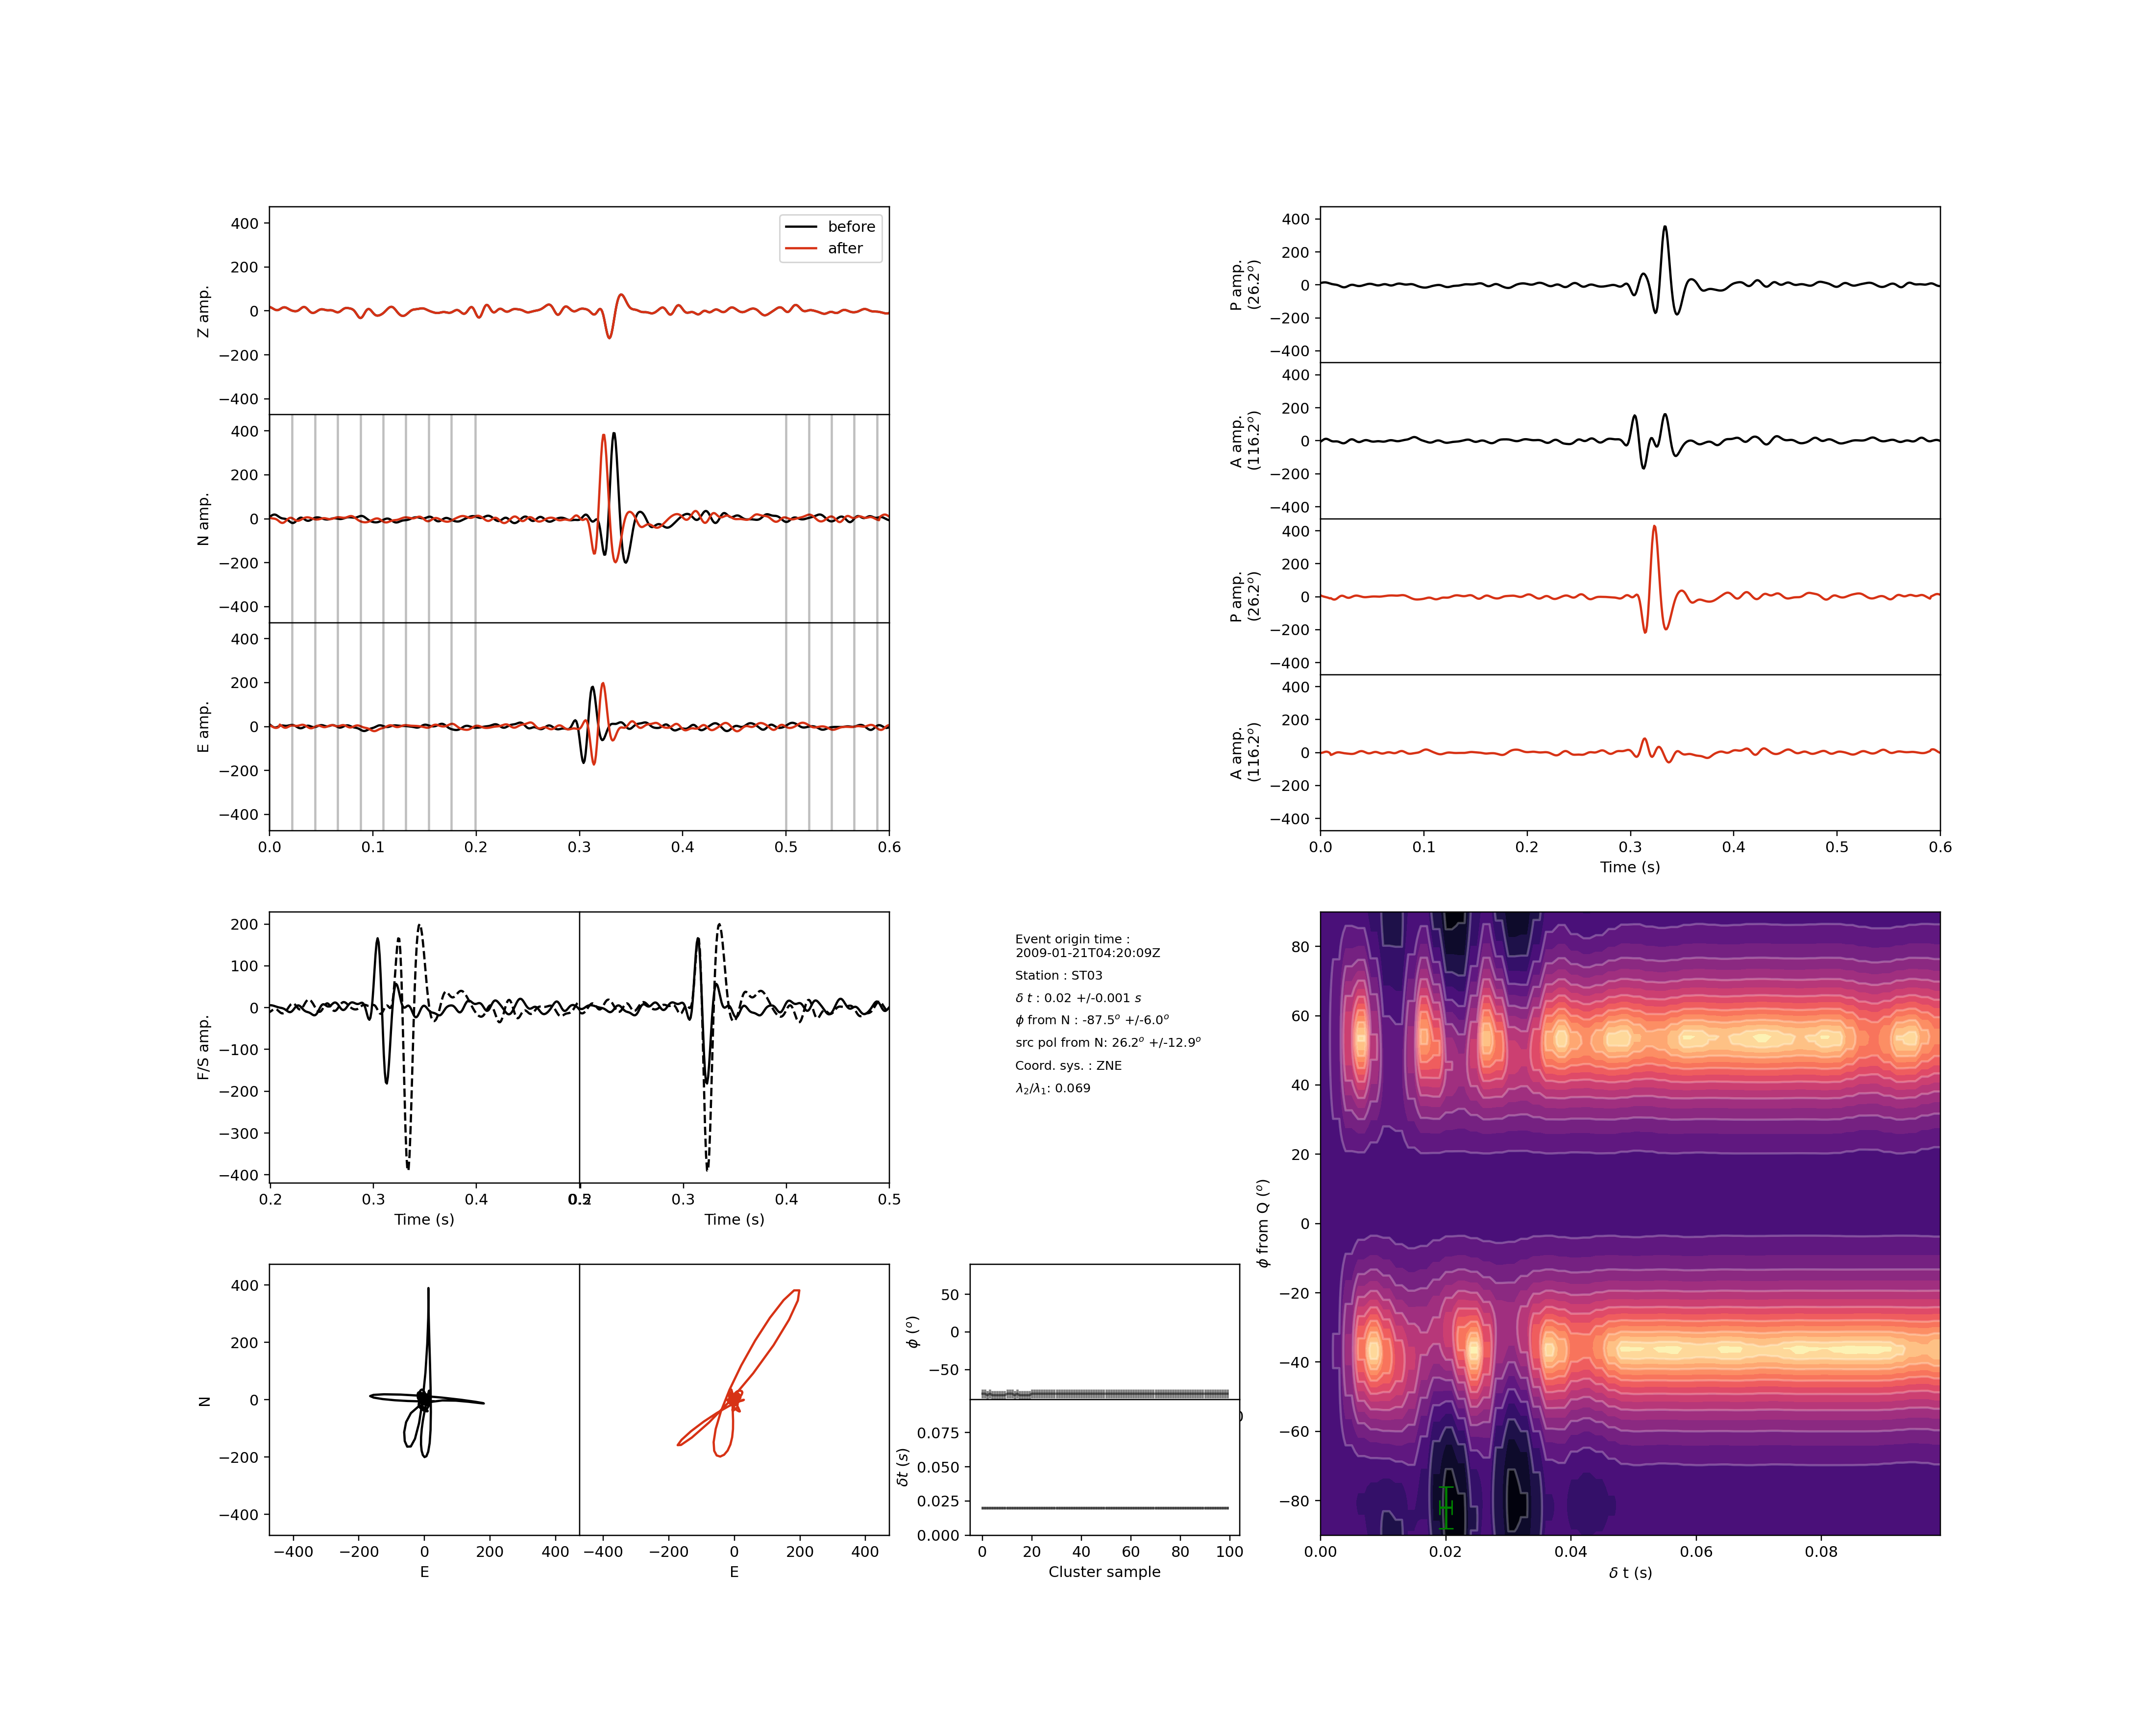

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1907: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


<IPython.core.display.Javascript object>


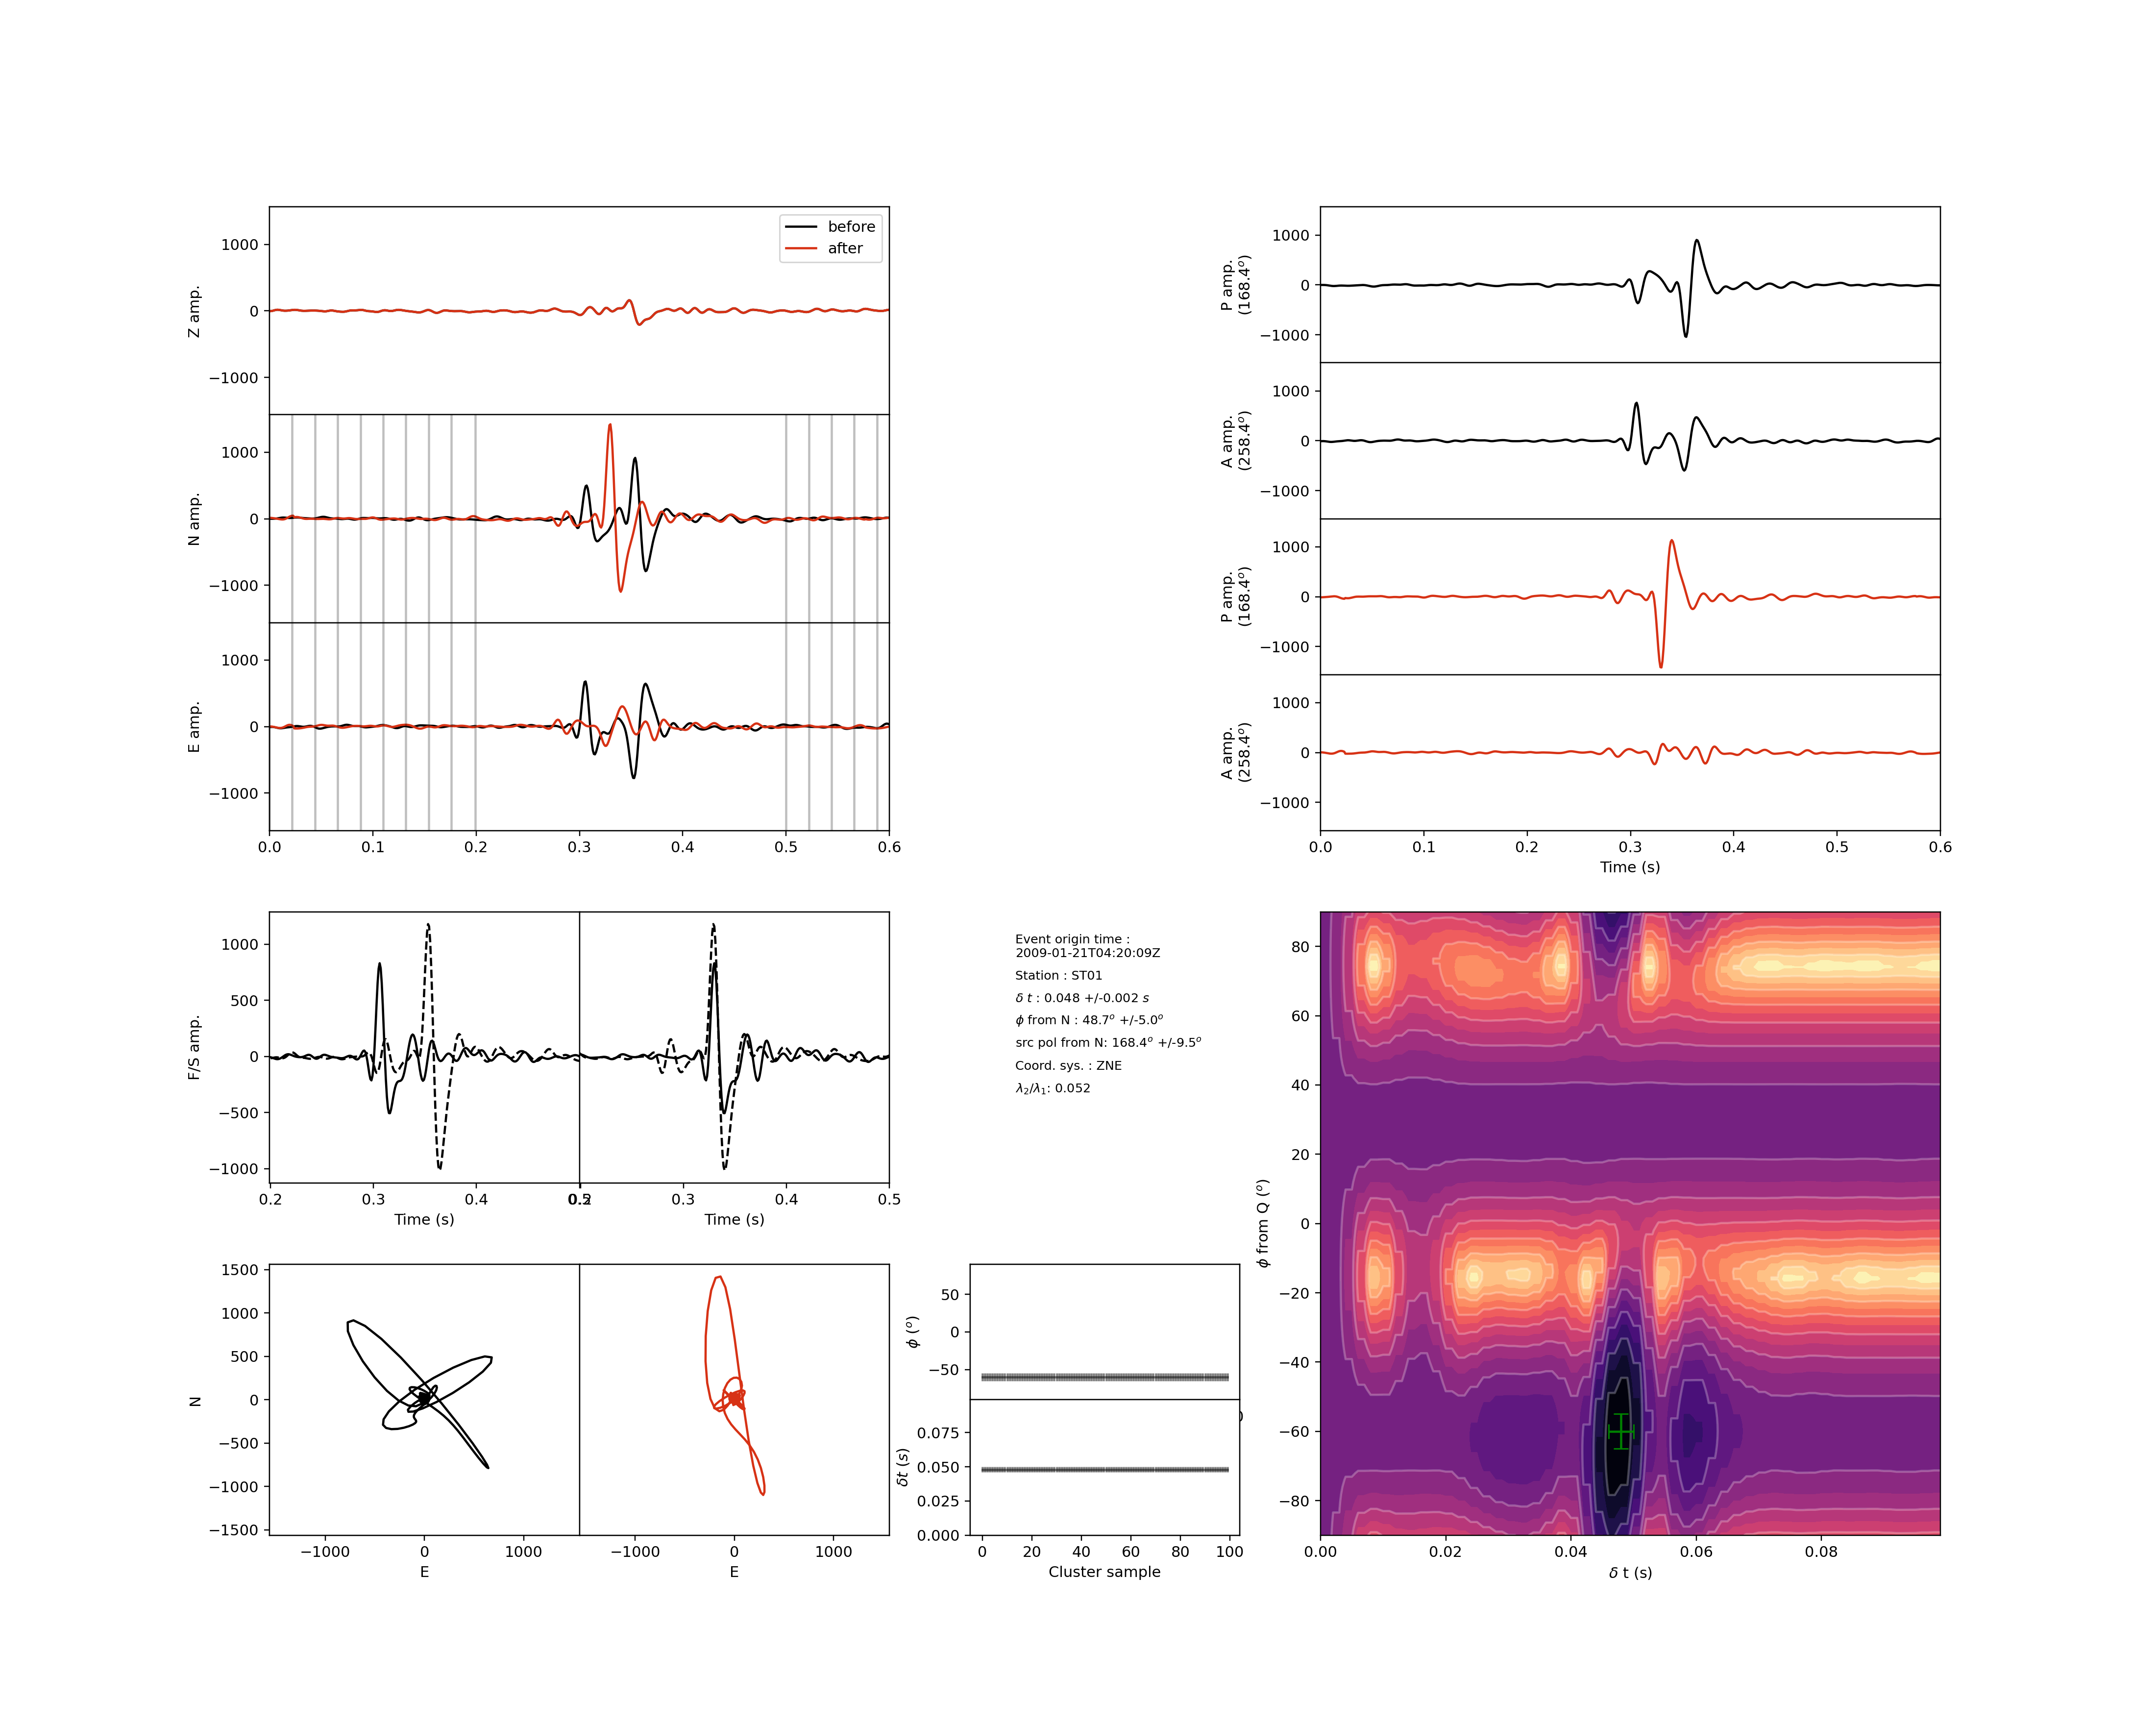

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1907: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


No S phase pick for station: ST09 therefore skipping this station.
Skipping waveform correction for station: ST09
No S phase pick for station: ST07 therefore skipping this station.
Skipping waveform correction for station: ST07


In [10]:
splitting_event.plot(outdir='plots')

## 4. Save result:

In [11]:
# And save result to file:
splitting_event.save_result()


Saved sws result to: /Users/eart0504/Documents/python/github_repositories/swspy/examples/single_event_example/20090121042009_sws_result.csv
